# Sentiment Analysis: Large Movie Review Dataset


---
## 1. Get the data


In [1]:
from src import data_utils
import os
import sys
import numpy as np
from gensim.models import Word2Vec
import nltk

sys.path.append(os.path.dirname(os.getcwd()))

from src import word2vec
from src import evaluation
from src import text_normalizer

np.random.seed(42)

train, test = data_utils.get_datasets()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\camil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\camil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
X_train, y_train, X_test, y_test = data_utils.split_data(train, test)

---
## 2. Normalize the data

In [3]:
stop_words = nltk.corpus.stopwords.words("english")

In [4]:
norm_train_reviews = text_normalizer.normalize_corpus(X_train, stopwords=stop_words)
norm_test_reviews = text_normalizer.normalize_corpus(X_test, stopwords=stop_words)

c:\Users\camil\Desktop\Python\Anyone AI\SPRINT 5\assignment\assignment\src\text_normalizer.py:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


**(\*) Functions will be checked using unit tests.**

---
## 3. Feature Engineering


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

train_features = tfidf_vectorizer.fit_transform(X_train)

test_features = tfidf_vectorizer.transform(X_test)

## 4. Modeling and Performance Evaluation

In [6]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(max_iter=1000, random_state=42)

baseline_model.fit(train_features, y_train)
model_predictions = baseline_model.predict(test_features)

In [7]:
accuracy, precision, recall, f1_score = evaluation.get_performance(
    model_predictions, y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.88316
Precision: 0.8841125992461304
Recall: 0.88192
F1 Score: 0.8830149385237694

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.88      0.88      0.88     12500
           0       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  11055   1445
1   1476  11024


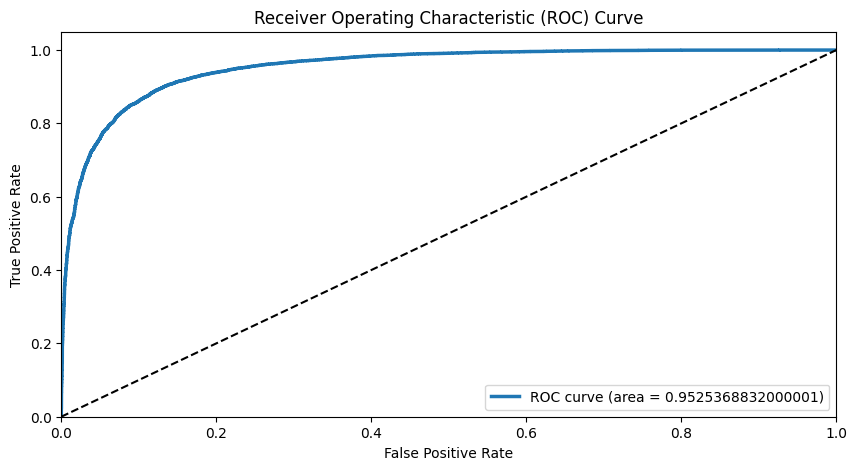

0.9525368832000001

In [8]:
evaluation.plot_roc(baseline_model, y_test, test_features)

---

## 5. Classifying using K-Means

Let use tfidf features computed in last section as vector inputs for kmeans.

In [9]:
# TODO Complete in this cell: Train the k-means clustering model using `n_clusters=2`.
# Having the model trained, use it to make predictions on the test dataset.
# Assign the predictions to the variable `kmeans_predictions`, it will be used in the
# following cell to evaluate the model performance.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(train_features)
print(f"Converged after {kmeans.n_iter_} iterations")
kmeans_predictions = kmeans.predict(test_features)

c:\Users\camil\.conda\envs\sprint_5\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Converged after 23 iterations


In [10]:
accuracy, precision, recall, f1_score = evaluation.get_performance(
    [1 - el for el in kmeans_predictions], y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.48272
Precision: 0.4798882681564246
Recall: 0.41232
F1 Score: 0.44354561101549056

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.48      0.41      0.44     12500
           0       0.48      0.55      0.52     12500

    accuracy                           0.48     25000
   macro avg       0.48      0.48      0.48     25000
weighted avg       0.48      0.48      0.48     25000


Prediction Confusion Matrix:
------------------------------
      0     1
0  6914  5586
1  7346  5154


---
## 6. Feature Engineering with Custom Word Embedding

### Tokenize reviews and train Word Embedding


In [11]:
from gensim.models import Word2Vec
from nltk.tokenize import ToktokTokenizer
from sklearn.model_selection import train_test_split

# TODO: Create and store here the tokenized train and test data.
tokenizer = ToktokTokenizer()
tokenized_train = [tokenizer.tokenize(review) for review in norm_train_reviews]
tokenized_test = [tokenizer.tokenize(review)for review in norm_test_reviews]

# TODO: Train your Word2Vec model and assign it to `model_w2v`.
# The output model vector size (w2v_vector_size) is set by default to 100,
# you can change it if you want.
w2v_vector_size = 100
model_w2v = Word2Vec(
    sentences=tokenized_train,
    vector_size=w2v_vector_size,
    )


### Generate averaged word vector features


In [12]:
w2v_train_features = word2vec.vectorizer(
    corpus=tokenized_train, model=model_w2v, num_features=w2v_vector_size
)
w2v_test_features = word2vec.vectorizer(
    corpus=tokenized_test, model=model_w2v, num_features=w2v_vector_size
)


### Modeling

In [18]:
logistic_w2v = LogisticRegression(max_iter=1000, random_state=42)

logistic_w2v.fit(w2v_train_features, y_train)
logistic_wv2_model = logistic_w2v.predict(w2v_test_features)

logistic_tfidf = LogisticRegression(max_iter=1000, random_state=42)

logistic_tfidf.fit(train_features, y_train)
logistic_tfidf_model = logistic_tfidf.predict(test_features)

best_model = logistic_tfidf

In [20]:
accuracy, precision, recall, f1_score = evaluation.get_performance(
    logistic_wv2_model, y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.84508
Precision: 0.8446113285931134
Recall: 0.84576
F1 Score: 0.8451852740136706

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.84      0.85      0.85     12500
           0       0.85      0.84      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  10555   1945
1   1928  10572


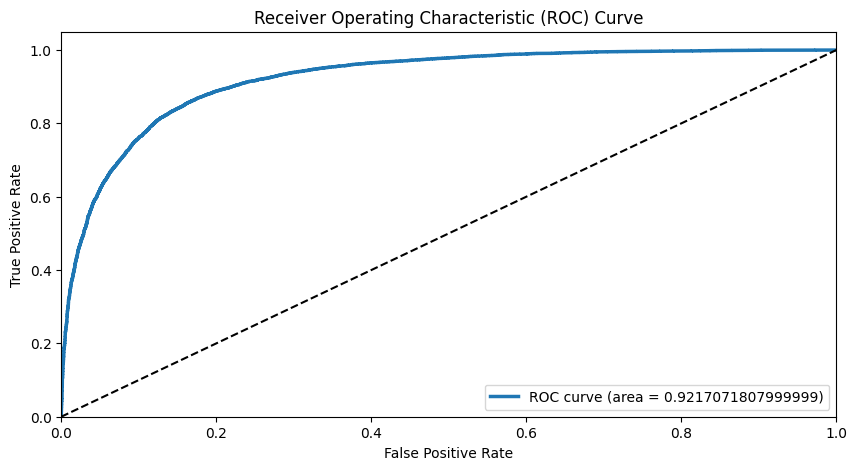

0.9217071807999999

In [23]:
evaluation.plot_roc(logistic_w2v, y_test, w2v_test_features)

## 7. Predict data

In [26]:
from src import config
from pathlib import Path
DATASET_TEST_PREDICT = str(Path(config.DATASET_ROOT_PATH) / "movies_review_predict_aai.csv")
test_preds = logistic_tfidf.predict_proba(test_features)[:, 1]
test["positive"] = test_preds
test.to_csv(DATASET_TEST_PREDICT, index=False)


---
### OPTIONAL:

I invite you to investigate and use one of the `pre-trained Word2Vec models`.

If you look for the `Pretrained models` section in this [link](https://radimrehurek.com/gensim/models/word2vec.html), you will find information about the models that Gensim owns.